## Detecting Malicious URL With Machine Learning In Python



In [1]:
# EDA Packages
import pandas as pd
import numpy as np
import random


# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load Url Data 
urls_data = pd.read_csv("urldata.csv")

In [3]:
type(urls_data)

pandas.core.frame.DataFrame

In [4]:
urls_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


### Data Vectorization Using TfidVectorizer
#### Create A tokenizer
 + Split ,Remove Repetitions and "Com"

In [5]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [6]:
# Labels
y = urls_data["label"]

In [7]:
# Features
url_list = urls_data["url"]

In [8]:
# Using Default Tokenizer
#vectorizer = TfidfVectorizer()

# Using Custom Tokenizer
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [9]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)

#### Split into training and testing dataset 80/20 ratio

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [11]:
# Model Building
#using logistic regression
logit = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=19000)
logit.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=19000)

In [12]:
# Accuracy of Our Model
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9728874830546769


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pallavisumakurmala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


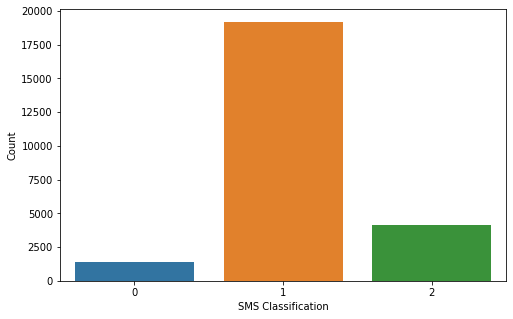

/Users/pallavisumakurmala/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Accuracy score for alpha=0.0 is: 88.72%
Accuracy score for alpha=0.1 is: 88.9%
Accuracy score for alpha=0.2 is: 88.88%
Accuracy score for alpha=0.3 is: 88.94%
Accuracy score for alpha=0.4 is: 88.97%
Accuracy score for alpha=0.5 is: 89.03%
Accuracy score for alpha=0.6 is: 89.03%
Accuracy score for alpha=0.7 is: 89.05%
Accuracy score for alpha=0.8 is: 89.01%
Accuracy score for alpha=0.9 is: 88.99%
Accuracy score for alpha=1.0 is: 89.09%
--------------------------------------------
The best accuracy is 89.09% with alpha value as 1.0
Wait a minute, this is a abusive!


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
sms = pd.read_csv('labeled_data.csv')
sms.keys()
df=sms.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],axis=1)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.keys()
df.shape
df['target'].value_counts()
plt.figure(figsize=(8,5))
sns.countplot(x='target', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.tweet[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(df['target'])
y = y.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)
result = ['Wait a minute, this is a abusive!','Ohhh, this is a normal message.']
msg = "hello"

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

In [81]:
#Taking Message From Telegram 
import requests
from datetime import datetime, timedelta
import time
import pytz
import re
import json
from os import environ
import nltk

# nltk.download('words')

from nltk.corpus import words
IST = pytz.timezone('Asia/Kolkata')  
today_date = datetime.now(IST).strftime("%d-%m-%Y") #Current Date
curr_time = (datetime.now().strftime("%H:%M:%S"))   #Current time
kount=0
z=0
tele_auth_token = "5526408948:AAG5_Zhs5SkRI7F1fzemJLm-XzmO1uVuf6A" # Authentication token provided by Telegram bot
tel_group_id = "alliswell1678"     # Telegram group name
base_url = "https://api.telegram.org/bot5526408948:AAG5_Zhs5SkRI7F1fzemJLm-XzmO1uVuf6A/getUpdates"
parameters = {
    "offset" :0
}
def send_msg_on_telegram(message):
    
    telegram_api_url=f" https://api.telegram.org/bot{tele_auth_token}/sendMessage?chat_id=-1001504981007&text={message}"
    tel_resp=requests.get(telegram_api_url)

    if tel_resp.status_code == 200:
        print("Delivered")
    else:
        print("Not deleviertd")
        


resp = requests.get("https://api.telegram.org/bot5526408948:AAG5_Zhs5SkRI7F1fzemJLm-XzmO1uVuf6A/getUpdates?offset=362160264")

print(resp.text)
with open('dat.json', 'w') as f:
        f.write(resp.text)
myjsonfile = open('dat.json')
jsondata = myjsonfile.read()
date=[]
msg=[]
obj = json.loads(jsondata)
list=obj['result']

for i in range(len(list)):
    
    d =list[i].get("message").get("date")
    m=list[i].get("message").get("text")
    # print("msg-{} date-{}".format(m,d))
    date.append(d)
    msg.append(m)

print(msg)
print(date)



n1=0
count=1
for i in range(len(msg)-2):
    if(msg[i]==msg[i+1] and msg[i]==msg[i+2]):
        # print(msg[0])
        count=count+1
        n1=date[i+2]-date[i]

if(n1<60 and count>1 ) :
    count=count+1
    send_msg_on_telegram("ABOVE {} MESSAGES ARE SPAM".format(count))
    z=9
d=0
for i in range(len(list)):
    
    d =list[i].get("update_id")
print(d)
   

        





def get_and_response(update_id):
    basic_url =f"https://api.telegram.org/bot5526408948:AAG5_Zhs5SkRI7F1fzemJLm-XzmO1uVuf6A/getUpdates?offset={update_id}"
    response = requests.get(basic_url)
   
    with open('data.json', 'w') as f:
        f.write(response.text)
    myjsonfile = open('data.json')
    jsondata = myjsonfile.read()

    obj = json.loads(jsondata)


    n=-1001504981007
    list=obj['result']

    for i in range(len(list)):
       
        m = list[i].get("message").get("chat").get("id")

        
    msg=list[-1].get("message").get("text")
    print(msg)
    return msg
        
    



k=get_and_response(d)
def is_sentence_meaningless(sentence):
    is_meaningless = True
    for word in sentence.split():
        if(word in words.words()):
            is_meaningless = False
            break
    return is_meaningless    
sm=0
if(is_sentence_meaningless(k)):
    kount=kount+1
    sm=1
    print('i')
else:
    k=k
fk=0
X_predict = [k]
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)
print(New_predict)
if(New_predict[0]=='good'):
    k=k
else:
    kount=kount+1
    fk=1
bw=0    

if( kount==2 or (sm==1 and fk==1 )) :
    k=k+"-" +"SPAM"
if(z==0):
    send_msg_on_telegram(k)



{"ok":true,"result":[{"update_id":362160347,
"message":{"message_id":269,"from":{"id":1288546474,"is_bot":false,"first_name":"Pallavi Suma","last_name":"Kurmala","language_code":"en"},"chat":{"id":-1001504981007,"title":"Balu","username":"alliswell1678","type":"supergroup"},"date":1657820787,"text":"https://db.aa419.org/fakebankslist.php","entities":[{"offset":0,"length":38,"type":"url"}]}},{"update_id":362160348,
"message":{"message_id":271,"from":{"id":1288546474,"is_bot":false,"first_name":"Pallavi Suma","last_name":"Kurmala","language_code":"en"},"chat":{"id":-1001504981007,"title":"Balu","username":"alliswell1678","type":"supergroup"},"date":1657820822,"text":"pakistanifacebookforever.com/getpassword.php/","entities":[{"offset":0,"length":45,"type":"url"}]}}]}
['https://db.aa419.org/fakebankslist.php', 'pakistanifacebookforever.com/getpassword.php/']
[1657820787, 1657820822]
362160348
pakistanifacebookforever.com/getpassword.php/
i
['good']
Delivered


### Predicting With Our Model

['good' 'good' 'bad' 'bad' 'bad' 'bad']


In [16]:
# https://db.aa419.org/fakebankslist.php
X_predict1 = ["www.buyfakebillsonlinee.blogspot.com", 
"www.unitedairlineslogistics.com",
"www.stonehousedelivery.com",
"www.silkroadmeds-onlinepharmacy.com" ,
"https://www.google.com"]

In [17]:
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = logit.predict(X_predict1)
print(New_predict1)

['bad' 'bad' 'bad' 'bad' 'bad']


In [18]:
# Using Default Tokenizer
vectorizer = TfidfVectorizer()

In [19]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)	

In [20]:
# Model Building

logit = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)#using logistic regression
logit.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=10000)

In [21]:
# Accuracy of Our Model with our Custom Token
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9684397036614225
